In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Nº of new links formed when joining networks of given sizes

In [2]:
union_info = pd.read_csv('../data/union_info.csv', header=None)
union_info.columns = ['Size_A','Size_B', 'N_Links']
union_info = union_info.loc[union_info['N_Links']>0]
union_info.head()

,Size_A,Size_B,N_Links
0,1,1,1
1,2,1,1
2,1,1,1
3,1,2,1
4,1,1,1


Mean number of missing links (with respect to the maximum given by the size of the smallest network)

In [3]:
links_mat = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        links_mat[i,j] = np.mean(union_info.loc[(union_info['Size_A']==i+1) & (union_info['Size_B']==j+1), 'N_Links'])
        links_mat[i,j] = min(i,j)+1 - links_mat[i,j]
        links_mat[i,j] /= min(i,j)+1

Text(0.5, 1.0, 'Mean Fraction of Missing Links')

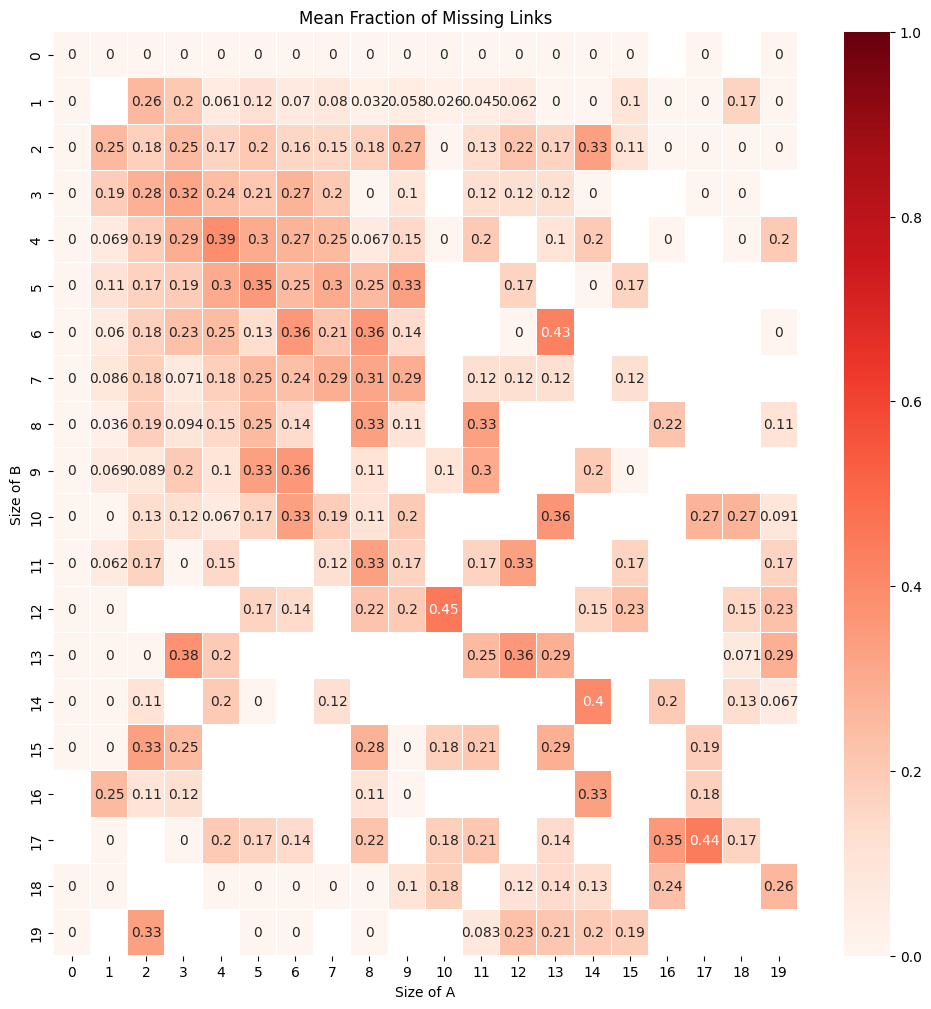

In [4]:
plt.figure(figsize=(12,12))
sn.heatmap(links_mat, vmax=1, annot=True, cmap='Reds', linewidths=0.1)
plt.xlabel('Size of A')
plt.ylabel('Size of B')
plt.title('Mean Fraction of Missing Links')